In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

## Data Exploration

In [2]:
data = pd.read_csv('hepatitis.csv')
data

,ID,target,age,gender,steroid,antivirals,fatigue,malaise,anorexia,liverBig,...,spleen,spiders,ascites,varices,bili,alk,sgot,albu,protime,histology
0,1,2,30,2,1,2,2,2,2,1,...,2,2,2,2,1,85,18,4,?,1
1,2,2,50,1,1,2,1,2,2,1,...,2,2,2,2,0.9,135,42,3.5,?,1
2,3,2,78,1,2,2,1,2,2,2,...,2,2,2,2,0.7,96,32,4,?,1
3,4,2,31,1,?,1,2,2,2,2,...,2,2,2,2,0.7,46,52,4,80,1
4,5,2,34,1,2,2,2,2,2,2,...,2,2,2,2,1,?,200,4,?,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,151,1,46,1,2,2,1,1,1,2,...,2,1,1,1,7.6,?,242,3.3,50,2
151,152,2,44,1,2,2,1,2,2,2,...,2,2,2,2,0.9,126,142,4.3,?,2
152,153,2,61,1,1,2,1,1,2,1,...,2,1,2,2,0.8,75,20,4.1,?,2
153,154,2,53,2,1,2,1,2,2,2,...,1,1,2,1,1.5,81,19,4.1,48,2


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          155 non-null    int64 
 1   target      155 non-null    int64 
 2   age         155 non-null    int64 
 3   gender      155 non-null    int64 
 4   steroid     155 non-null    object
 5   antivirals  155 non-null    int64 
 6   fatigue     155 non-null    object
 7   malaise     155 non-null    object
 8   anorexia    155 non-null    object
 9   liverBig    155 non-null    object
 10  liverFirm   155 non-null    object
 11  spleen      155 non-null    object
 12  spiders     155 non-null    object
 13  ascites     155 non-null    object
 14  varices     155 non-null    object
 15  bili        155 non-null    object
 16  alk         155 non-null    object
 17  sgot        155 non-null    object
 18  albu        155 non-null    object
 19  protime     155 non-null    object
 20  histology 

In [4]:
# assign 'object_columns' to a list that has all dtypes 'object'
# to a list
object_columns = data.select_dtypes(include='object').columns
object_columns

Index(['steroid', 'fatigue', 'malaise', 'anorexia', 'liverBig', 'liverFirm',
       'spleen', 'spiders', 'ascites', 'varices', 'bili', 'alk', 'sgot',
       'albu', 'protime'],
      dtype='object')

In [5]:
# counts how many rows have the '?' in the column 'protime'
len(data[data['protime']=='?'])

67

In [6]:
# counts how many rows have the '?' in the column 'alk'
len(data[data['alk']=='?'])

29

In [7]:
# counts 'alk' column with the total # of missing non-values
data['alk'].value_counts().sum()

155

In [8]:
# loop iterates each column 
# prints out each column with total # of unique value
for col in data.columns:
    print(col, ':', data[col].nunique())

ID : 155
target : 2
age : 49
gender : 2
steroid : 3
antivirals : 2
fatigue : 3
malaise : 3
anorexia : 3
liverBig : 3
liverFirm : 3
spleen : 3
spiders : 3
ascites : 3
varices : 3
bili : 35
alk : 84
sgot : 85
albu : 30
protime : 45
histology : 2


## preprocessing

In [9]:
# Loop iterates each column in 'object columns'
# converts col to a numeric datatype
for col in object_columns:
    data[col] = pd.to_numeric(data[col], errors='coerce')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          155 non-null    int64  
 1   target      155 non-null    int64  
 2   age         155 non-null    int64  
 3   gender      155 non-null    int64  
 4   steroid     154 non-null    float64
 5   antivirals  155 non-null    int64  
 6   fatigue     154 non-null    float64
 7   malaise     154 non-null    float64
 8   anorexia    154 non-null    float64
 9   liverBig    145 non-null    float64
 10  liverFirm   144 non-null    float64
 11  spleen      150 non-null    float64
 12  spiders     150 non-null    float64
 13  ascites     150 non-null    float64
 14  varices     150 non-null    float64
 15  bili        149 non-null    float64
 16  alk         126 non-null    float64
 17  sgot        151 non-null    float64
 18  albu        139 non-null    float64
 19  protime     88 non-null     f

In [11]:
# for loop fills in missing values in the 'data' DataFrame
for col in data.columns:
    data[col].fillna(data[col].mean(), inplace=True)

In [12]:
# drop 'ID' column
data = data.drop(['ID'], axis=1)

<Axes: >

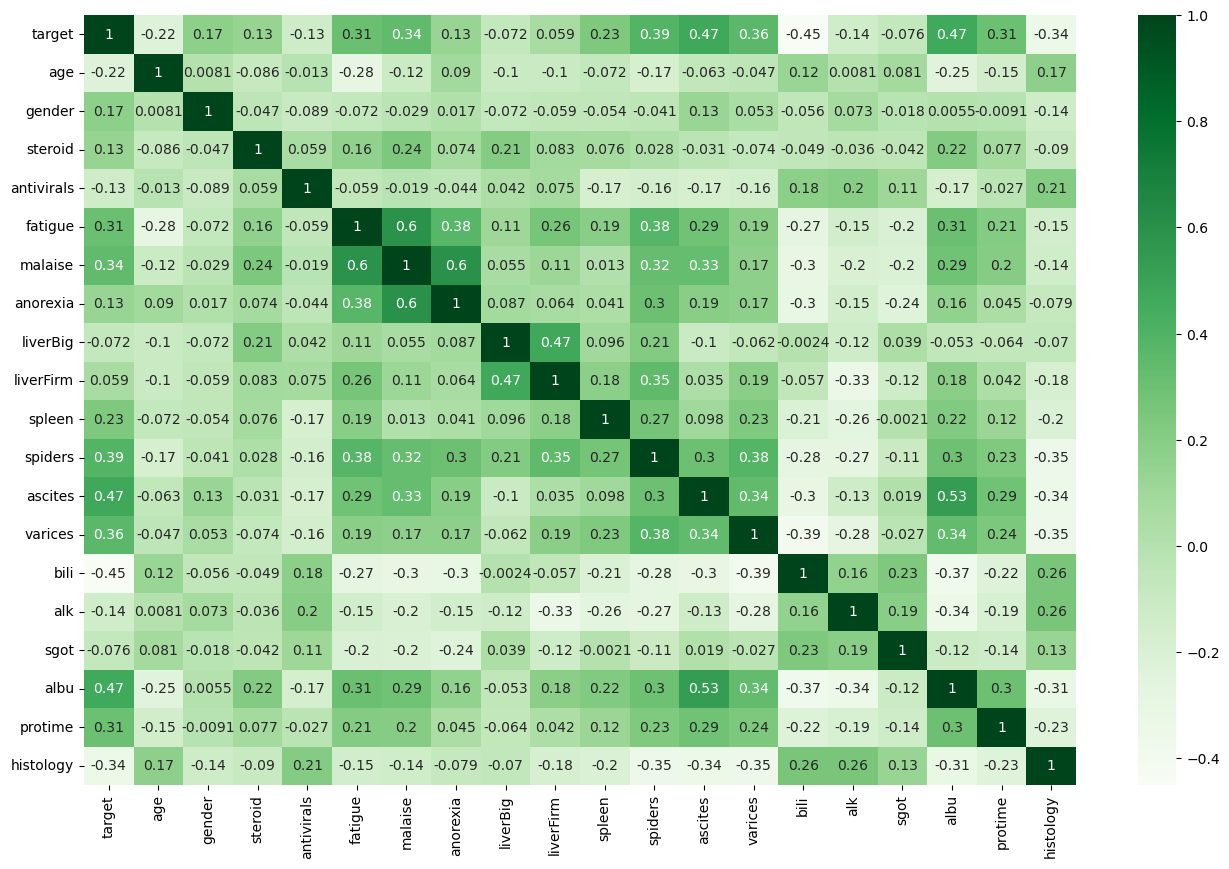

In [13]:
# create a heatmap
plt.figure(figsize=(16,10))
sns.heatmap(data.corr(), annot=True, cmap='Greens')

## plan evaluation strategy

In [14]:
x = data.drop('target', axis=1)
y = data['target']

In [17]:
sc = StandardScaler()
x = sc.fit_transform(x)

In [18]:
# providing train_test_split function
x_train , x_test , y_train , y_test = train_test_split(x,y , 
                                                       test_size=.3 ,random_state=40)

## train the model

In [20]:
model = SVC()
model.fit(x_train, y_train)

SVC()

In [21]:
y_pred = model.predict(x_test)

In [22]:
model.score(x_test, y_test)

0.851063829787234

## Gamma

In [23]:
model_g = SVC(gamma=10)
model_g.fit(x_train, y_train)
model_g.score(x_test, y_test)

0.8085106382978723